In [68]:
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import RobustScaler, StandardScaler,MinMaxScaler
from datasist.structdata import detect_outliers
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import joblib
import warnings 
warnings.simplefilter("ignore")
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [5]:
df.shape

(6019, 13)

In [6]:
df.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [7]:
df.isna().mean()*100

Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.033228
Engine                0.598106
Power                 0.598106
Seats                 0.697790
New_Price            86.310018
Price                 0.000000
dtype: float64

In [8]:
#droping this columns 86% null, plus dropping null values it's very small
df.drop('New_Price', axis=1, inplace=True)
df.dropna(axis=0, inplace=True)


In [9]:
df.isna().mean()*100

Name                 0.0
Location             0.0
Year                 0.0
Kilometers_Driven    0.0
Fuel_Type            0.0
Transmission         0.0
Owner_Type           0.0
Mileage              0.0
Engine               0.0
Power                0.0
Seats                0.0
Price                0.0
dtype: float64

In [10]:
df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [11]:
df['Mileage'].unique()

array(['26.6 km/kg', '19.67 kmpl', '18.2 kmpl', '20.77 kmpl', '15.2 kmpl',
       '21.1 km/kg', '23.08 kmpl', '11.36 kmpl', '20.54 kmpl',
       '22.3 kmpl', '21.56 kmpl', '16.8 kmpl', '25.2 kmpl', '12.7 kmpl',
       '0.0 kmpl', '13.5 kmpl', '25.8 kmpl', '28.4 kmpl', '20.45 kmpl',
       '14.84 kmpl', '22.69 kmpl', '23.65 kmpl', '13.53 kmpl',
       '18.5 kmpl', '14.4 kmpl', '20.92 kmpl', '17.5 kmpl', '12.8 kmpl',
       '19.01 kmpl', '14.53 kmpl', '11.18 kmpl', '12.4 kmpl',
       '16.09 kmpl', '14.0 kmpl', '24.3 kmpl', '18.15 kmpl', '11.74 kmpl',
       '22.07 kmpl', '19.7 kmpl', '25.4 kmpl', '25.32 kmpl', '14.62 kmpl',
       '14.28 kmpl', '14.9 kmpl', '11.25 kmpl', '24.4 kmpl', '16.55 kmpl',
       '17.11 kmpl', '22.9 kmpl', '17.8 kmpl', '18.9 kmpl', '15.04 kmpl',
       '25.17 kmpl', '20.36 kmpl', '13.29 kmpl', '13.68 kmpl',
       '20.0 kmpl', '15.8 kmpl', '25.0 kmpl', '16.4 kmpl', '24.52 kmpl',
       '22.1 kmpl', '8.5 kmpl', '15.1 kmpl', '16.95 kmpl', '19.64 kmpl',
       '16.

In [12]:
df['Mileage']=df['Mileage'].apply(lambda x:float(x.split()[0]))

In [13]:
df['Mileage'].head()

0    26.60
1    19.67
2    18.20
3    20.77
4    15.20
Name: Mileage, dtype: float64

In [14]:
df['Power'].unique()

array(['58.16 bhp', '126.2 bhp', '88.7 bhp', '88.76 bhp', '140.8 bhp',
       '55.2 bhp', '63.1 bhp', '171.5 bhp', '103.6 bhp', '74 bhp',
       '103.25 bhp', '116.3 bhp', '187.7 bhp', '115 bhp', '175.56 bhp',
       '98.6 bhp', '83.8 bhp', '167.62 bhp', '190 bhp', '88.5 bhp',
       '177.01 bhp', '80 bhp', '67.1 bhp', '102 bhp', '108.45 bhp',
       '138.1 bhp', '184 bhp', '179.5 bhp', '103.5 bhp', '64 bhp',
       '82 bhp', '254.8 bhp', '73.9 bhp', '46.3 bhp', '37.5 bhp',
       '77 bhp', '82.9 bhp', '149.92 bhp', '138.03 bhp', '112.2 bhp',
       '163.7 bhp', '71 bhp', '105 bhp', '174.33 bhp', '75 bhp',
       '103.2 bhp', '53.3 bhp', '78.9 bhp', '147.6 bhp', '147.8 bhp',
       '68 bhp', '186 bhp', '170 bhp', '69 bhp', '140 bhp', '78 bhp',
       '194 bhp', '500 bhp', '108.5 bhp', '86.8 bhp', '187.74 bhp',
       'null bhp', '132 bhp', '86.7 bhp', '73.94 bhp', '117.3 bhp',
       '218 bhp', '168.5 bhp', '89.84 bhp', '110 bhp', '90 bhp',
       '82.85 bhp', '67 bhp', '241.4 bhp', '3

In [15]:
df[df['Power']=='null bhp'].index

Int64Index([  76,   79,   89,  120,  143,  227,  245,  262,  307,  308,
            ...
            5529, 5533, 5647, 5755, 5759, 5861, 5873, 5925, 5943, 5985],
           dtype='int64', length=103)

In [16]:
df.drop(df[df['Power']=='null bhp'].index,axis=0,inplace=True)

In [17]:
df['Power']=df['Power'].apply(lambda x:float(x.split()[0]))

In [18]:
df['Power'].head()

0     58.16
1    126.20
2     88.70
3     88.76
4    140.80
Name: Power, dtype: float64

In [19]:
df['Engine'].unique()

array(['998 CC', '1582 CC', '1199 CC', '1248 CC', '1968 CC', '814 CC',
       '1461 CC', '2755 CC', '1598 CC', '1462 CC', '1497 CC', '2179 CC',
       '2477 CC', '1498 CC', '2143 CC', '1995 CC', '1984 CC', '1197 CC',
       '2494 CC', '1798 CC', '2696 CC', '2698 CC', '1061 CC', '1198 CC',
       '2987 CC', '796 CC', '624 CC', '1999 CC', '1991 CC', '2694 CC',
       '1120 CC', '2498 CC', '799 CC', '2393 CC', '1399 CC', '1796 CC',
       '2148 CC', '1396 CC', '1950 CC', '4806 CC', '1998 CC', '1193 CC',
       '2982 CC', '1493 CC', '2967 CC', '2993 CC', '1196 CC', '1799 CC',
       '2497 CC', '2354 CC', '1373 CC', '2996 CC', '1591 CC', '2894 CC',
       '5461 CC', '1595 CC', '936 CC', '1086 CC', '1997 CC', '1896 CC',
       '1390 CC', '1364 CC', '2199 CC', '993 CC', '999 CC', '1405 CC',
       '2956 CC', '1794 CC', '995 CC', '2496 CC', '1599 CC', '2400 CC',
       '1495 CC', '2523 CC', '793 CC', '4134 CC', '1395 CC', '2953 CC',
       '1586 CC', '2362 CC', '1496 CC', '1368 CC', '1298 CC',

In [20]:
df['Engine']=df['Engine'].apply(lambda x:int(x.split()[0]))

In [21]:
df['Engine'].head()

0     998
1    1582
2    1199
3    1248
4    1968
Name: Engine, dtype: int64

In [22]:
df['Location'].value_counts()

Mumbai        775
Hyderabad     718
Kochi         645
Coimbatore    629
Pune          594
Delhi         545
Kolkata       521
Chennai       476
Jaipur        402
Bangalore     347
Ahmedabad     220
Name: Location, dtype: int64

In [23]:
df['Year'].value_counts()

2014    794
2015    740
2016    737
2013    639
2017    586
2012    562
2011    452
2010    333
2018    298
2009    191
2008    162
2007    105
2019    102
2006     66
2005     42
2004     25
2003     14
2002     11
2000      4
2001      4
1998      3
1999      2
Name: Year, dtype: int64

In [24]:
df['Fuel_Type'].value_counts()

Diesel    3152
Petrol    2655
CNG         55
LPG         10
Name: Fuel_Type, dtype: int64

In [25]:
df['Transmission'].value_counts()

Manual       4170
Automatic    1702
Name: Transmission, dtype: int64

In [26]:
df['Seats'].value_counts()

5.0     4919
7.0      672
8.0      133
4.0       99
6.0       29
2.0       13
10.0       4
9.0        3
Name: Seats, dtype: int64

In [27]:
#droping the car where seat=0
drop_seat=df[df['Seats']==0].index

In [28]:
df = df.drop(drop_seat, axis=0)


In [29]:
df['Seats'].value_counts()

5.0     4919
7.0      672
8.0      133
4.0       99
6.0       29
2.0       13
10.0       4
9.0        3
Name: Seats, dtype: int64

In [30]:
df['Seats']=df['Seats'].astype(int)

In [31]:
df['Owner_Type'].value_counts()

First             4839
Second             925
Third              101
Fourth & Above       7
Name: Owner_Type, dtype: int64

In [32]:
# as we see the brand is the first word from the name so let's extract the brand
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,17.74


In [33]:
df['Brand']=df['Name'].apply(lambda x:x.split()[0])

In [34]:
df[['Name',"Brand"]].head()

,Name,Brand
0,Maruti Wagon R LXI CNG,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai
2,Honda Jazz V,Honda
3,Maruti Ertiga VDI,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Audi


In [35]:
df['Name']=df['Name'].apply(lambda x:" ".join (x.split()[:2]))

In [36]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti Wagon,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5,1.75,Maruti
1,Hyundai Creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5,12.50,Hyundai
2,Honda Jazz,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5,4.50,Honda
3,Maruti Ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7,6.00,Maruti
4,Audi A4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,17.74,Audi


<AxesSubplot:xlabel='Price', ylabel='Density'>

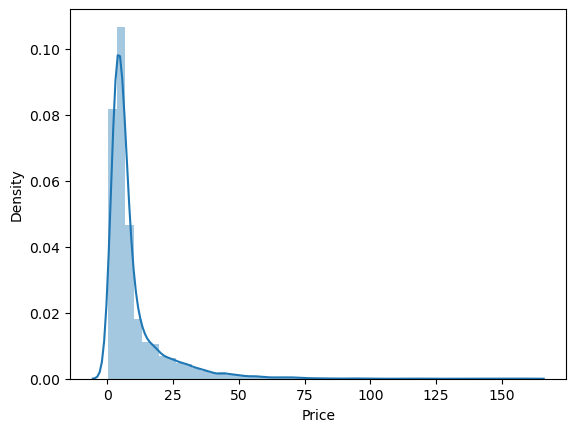

In [37]:
#price Distribution
sns.distplot(df['Price'])

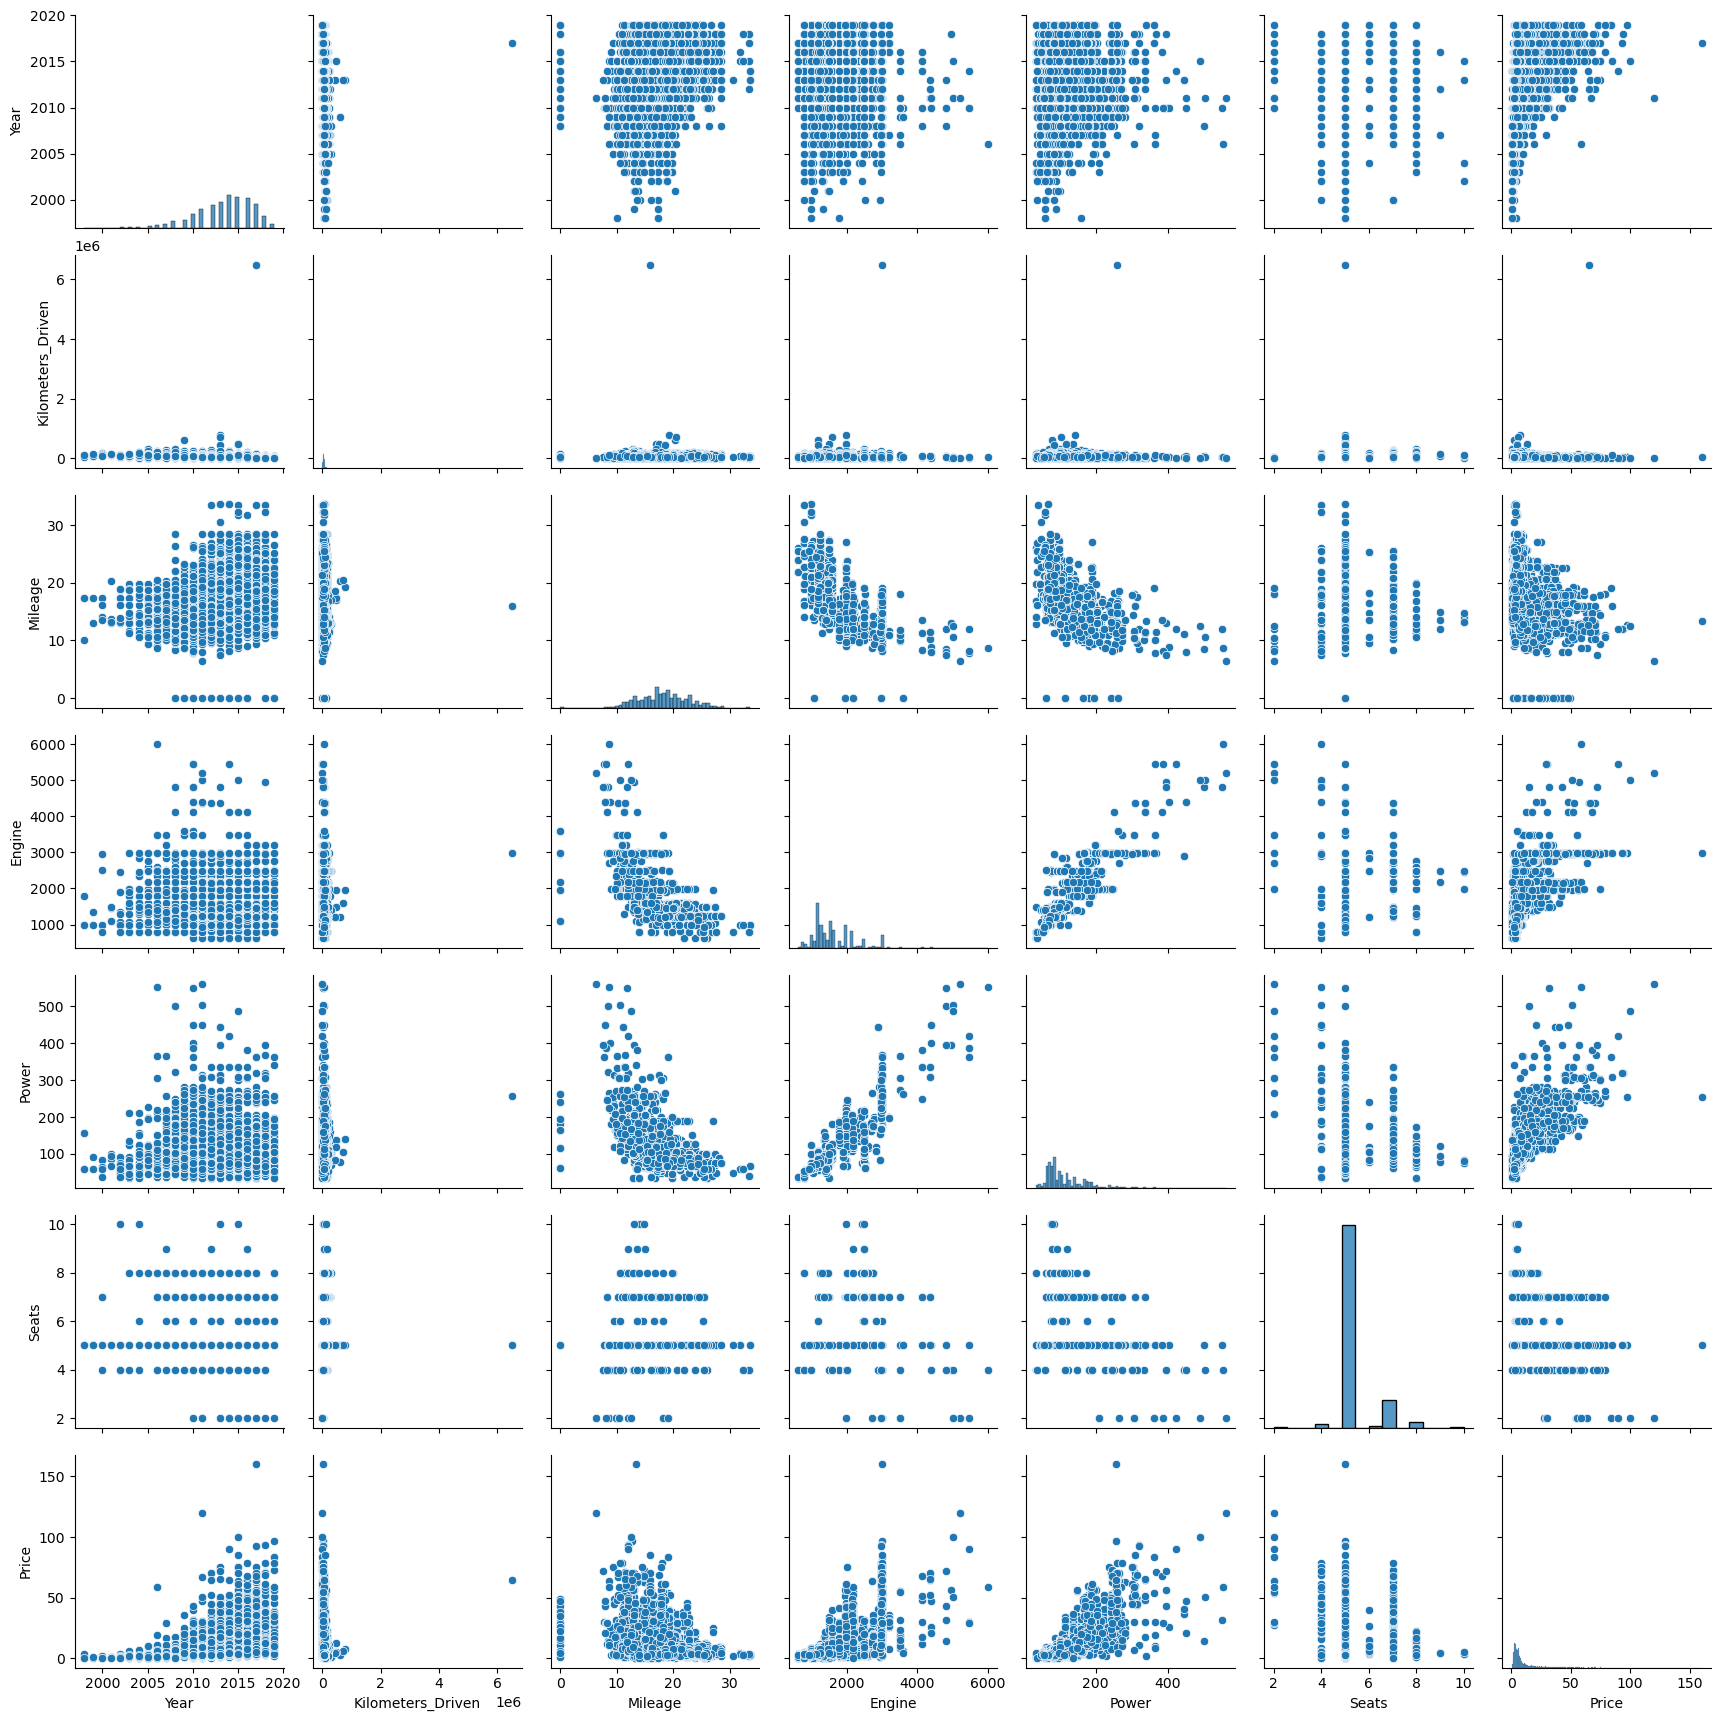

In [38]:
#The relation between the columns
sns.pairplot(df)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage            5872 non-null   float64
 8   Engine             5872 non-null   int64  
 9   Power              5872 non-null   float64
 10  Seats              5872 non-null   int32  
 11  Price              5872 non-null   float64
 12  Brand              5872 non-null   object 
dtypes: float64(3), int32(1), int64(3), object(6)
memory usage: 748.4+ KB


In [40]:
#let's check the outliers for all of the columns
Num_Columns=['Kilometers_Driven','Mileage','Engine','Power','Seats',"Price"]
df[Num_Columns]

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
0,72000,26.60,998,58.16,5,1.75
1,41000,19.67,1582,126.20,5,12.50
2,46000,18.20,1199,88.70,5,4.50
3,87000,20.77,1248,88.76,7,6.00
4,40670,15.20,1968,140.80,5,17.74
...,...,...,...,...,...,...
6014,27365,28.40,1248,74.00,5,4.75
6015,100000,24.40,1120,71.00,5,4.00
6016,55000,14.00,2498,112.00,8,2.90
6017,46000,18.90,998,67.10,5,2.65


In [41]:
outliers=detect_outliers(df,0,Num_Columns)

In [42]:
#27% of the data outliers
len(outliers)/df.shape[0]

0.2775885558583106

In [43]:
# data without any outliers
no_outliers=df[~df.index.isin(outliers)]

In [44]:
#filling outliers with median 
for col in Num_Columns:
    df.loc[df.index.isin(outliers),col]=no_outliers[col].mean()

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   float64
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage            5872 non-null   float64
 8   Engine             5872 non-null   float64
 9   Power              5872 non-null   float64
 10  Seats              5872 non-null   int32  
 11  Price              5872 non-null   float64
 12  Brand              5872 non-null   object 
dtypes: float64(5), int32(1), int64(1), object(6)
memory usage: 748.4+ KB


<AxesSubplot:xlabel='Price', ylabel='Location'>

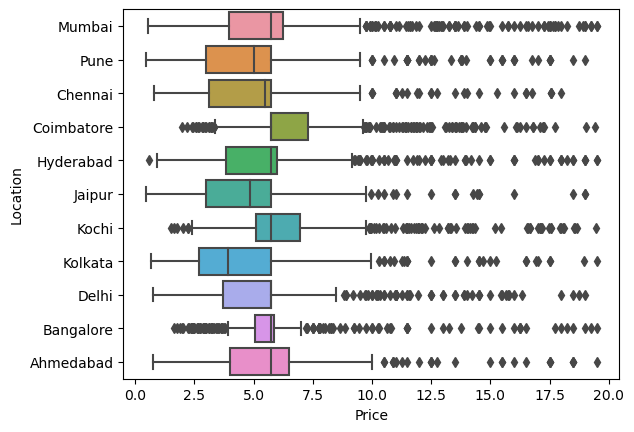

In [46]:
sns.boxplot(x='Price',y="Location",data=df)

In [47]:
df.drop("Name",axis=1,inplace=True)

In [48]:
df.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price', 'Brand'],
      dtype='object')

In [49]:
Nominal=['Location','Fuel_Type','Transmission','Brand']
Ordinal=['Owner_Type']

In [50]:
df['Owner_Type'].value_counts()

First             4839
Second             925
Third              101
Fourth & Above       7
Name: Owner_Type, dtype: int64

In [51]:
own={
    "First":4,
    "Second":3,
    "Third":2,
    "Fourth & Above":1 
}
df['Owner_Type']=df.Owner_Type.map(own)
df['Owner_Type'].value_counts()

4    4839
3     925
2     101
1       7
Name: Owner_Type, dtype: int64

In [52]:
df=pd.get_dummies(df,columns=Nominal,drop_first=True)

In [53]:
df

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,...,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,2010,72000.000000,4,26.600000,998.000000,58.160000,5,1.750000,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000.000000,4,19.670000,1582.000000,126.200000,5,12.500000,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000.000000,4,18.200000,1199.000000,88.700000,5,4.500000,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2012,52929.574022,4,19.423946,1392.026874,95.964114,5,5.721306,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670.000000,3,15.200000,1968.000000,140.800000,5,17.740000,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365.000000,4,28.400000,1248.000000,74.000000,5,4.750000,0,0,...,0,0,0,0,0,0,0,0,0,0
6015,2015,100000.000000,4,24.400000,1120.000000,71.000000,5,4.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
6016,2012,52929.574022,3,19.423946,1392.026874,95.964114,5,5.721306,0,0,...,0,0,0,0,0,0,0,0,0,0
6017,2013,46000.000000,4,18.900000,998.000000,67.100000,5,2.650000,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
scaler=StandardScaler()
df.iloc[:, :6]=scaler.fit_transform(df.iloc[:, :6])

In [84]:
df.iloc[:, :6].head()

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power
0,-1.099040,0.853890,0.438439,2.254154e+00,-1.333637,-1.337632e+00
1,0.481089,-0.534154,0.438439,7.729083e-02,0.642990,1.069843e+00
2,-0.783014,-0.310276,0.438439,-3.844681e-01,-0.653326,-2.570278e-01
3,-0.466988,0.000000,0.438439,-6.870280e-16,0.000000,-2.359137e-14
4,-0.150963,-0.548930,-1.804168,-1.326833e+00,1.949459,1.586438e+00


In [85]:
x=df.drop("Price",axis=1)
y=df["Price"]

In [86]:
x.head()

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,-1.099040,0.853890,0.438439,2.254154e+00,-1.333637,-1.337632e+00,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.481089,-0.534154,0.438439,7.729083e-02,0.642990,1.069843e+00,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.783014,-0.310276,0.438439,-3.844681e-01,-0.653326,-2.570278e-01,5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.466988,0.000000,0.438439,-6.870280e-16,0.000000,-2.359137e-14,5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.150963,-0.548930,-1.804168,-1.326833e+00,1.949459,1.586438e+00,5,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [87]:
y.head()

0     1.750000
1    12.500000
2     4.500000
3     5.721306
4    17.740000
Name: Price, dtype: float64

In [88]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2)

In [89]:
model=LinearRegression()

In [90]:
model.fit(xtrain,ytrain)

LinearRegression()

In [91]:
model.score(xtrain,ytrain)

0.6851468062813653

In [92]:
model.score(xtest,ytest)

0.7170588346986453

In [93]:
KN=KNeighborsRegressor(n_neighbors=6)

In [94]:
KN.fit(xtrain,ytrain)

KNeighborsRegressor(n_neighbors=6)

In [95]:
KN.score(xtrain,ytrain)

0.8751771815989358

In [96]:
KN.score(xtest,ytest)

0.8382997428188161